3.-Divide aleatoriamente el conjunto de datos de cáncer de seno de Wisconsin3

en un subconjunto de
entrenamiento con el 60 % de los datos, un subconjunto de validación con el 20 % y un subconjunto
de prueba con el 20 % restante usando 0 como semilla para tu generador de números aleatorios.
Este conjunto de datos contiene 699 registros de tumores de seno, de los cuales 458 son benignos y
241 son malignos.

In [1]:
#Librerias
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:

# URL del archivo de datos
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Cargar los datos en un DataFrame
df = pd.read_csv(url, header=None)  # No tiene encabezados, por eso usamos header=None


In [3]:
# Definir nombres de columnas en español
column_names = [
    "ID_Muestra", "Grosor_Tumor", "Uniformidad_Tamaño_Celular", 
    "Uniformidad_Forma_Celular", "Adhesión_Marginal", "Tamaño_Célula_Epitelial", 
    "Núcleos_Desnudos", "Cromatina_Blanda", "Nucléolos_Normales", 
    "Mitosis_Celular", "Clase"
]

# Asignar los nombres de columna
df.columns = column_names

In [4]:
# corroboramos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID_Muestra                  699 non-null    int64 
 1   Grosor_Tumor                699 non-null    int64 
 2   Uniformidad_Tamaño_Celular  699 non-null    int64 
 3   Uniformidad_Forma_Celular   699 non-null    int64 
 4   Adhesión_Marginal           699 non-null    int64 
 5   Tamaño_Célula_Epitelial     699 non-null    int64 
 6   Núcleos_Desnudos            699 non-null    object
 7   Cromatina_Blanda            699 non-null    int64 
 8   Nucléolos_Normales          699 non-null    int64 
 9   Mitosis_Celular             699 non-null    int64 
 10  Clase                       699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
#La columna tiene un tipo de dato objecto, veremos que valores extra a numeros tiene.
columna = "Núcleos_Desnudos"
valores_no_numericos = df[pd.to_numeric(df[columna], errors="coerce").isna()]
print(valores_no_numericos[columna])

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: Núcleos_Desnudos, dtype: object


In [6]:
#Encontramos 16 valores "?" en la columna "Núcleos_Desnudos" por lo que prcedemos a remplazarlos por 
#NANs y poder trabajar regularmente con ellos 
df.replace("?", pd.NA, inplace=True)

#Convertimos la columna a tipo entero
df["Núcleos_Desnudos"] = pd.to_numeric(df["Núcleos_Desnudos"]).astype("Int64")




In [7]:
#Validamos los 16 nans
print(df.isna().sum().sum())

16


In [8]:
#Validamos si el volumen de los datos coincide con la información proporcionada
pivot_table = df.pivot_table(values="ID_Muestra", index="Clase", aggfunc="count")
pivot_table.loc["Total"] = pivot_table.sum()
pivot_table["Porcentaje"] = (pivot_table["ID_Muestra"] / pivot_table.loc["Total", "ID_Muestra"]) * 100
pivot_table

,ID_Muestra,Porcentaje
Clase,,
2,458,65.522175
4,241,34.477825
Total,699,100.000000


Usaremos 3 metodologias para el tratamiento de los datos faltantes

1. Eliminar las filas con datos faltantes
2. Imputar los datos faltantes con la media
3. Interpolación lineal para los datos faltantes

In [9]:
#1 eliminar las filas con valores nulos 
df_clean_1 = df.dropna()

#2 reemplazar los valores nulos con la media de la columna
df_clean_2 = df
df_clean_2["Núcleos_Desnudos"] = df_clean_2["Núcleos_Desnudos"].fillna(round(df_clean_2["Núcleos_Desnudos"].mean(),0)).astype("int64")

#3 haremos una interpolación lineal


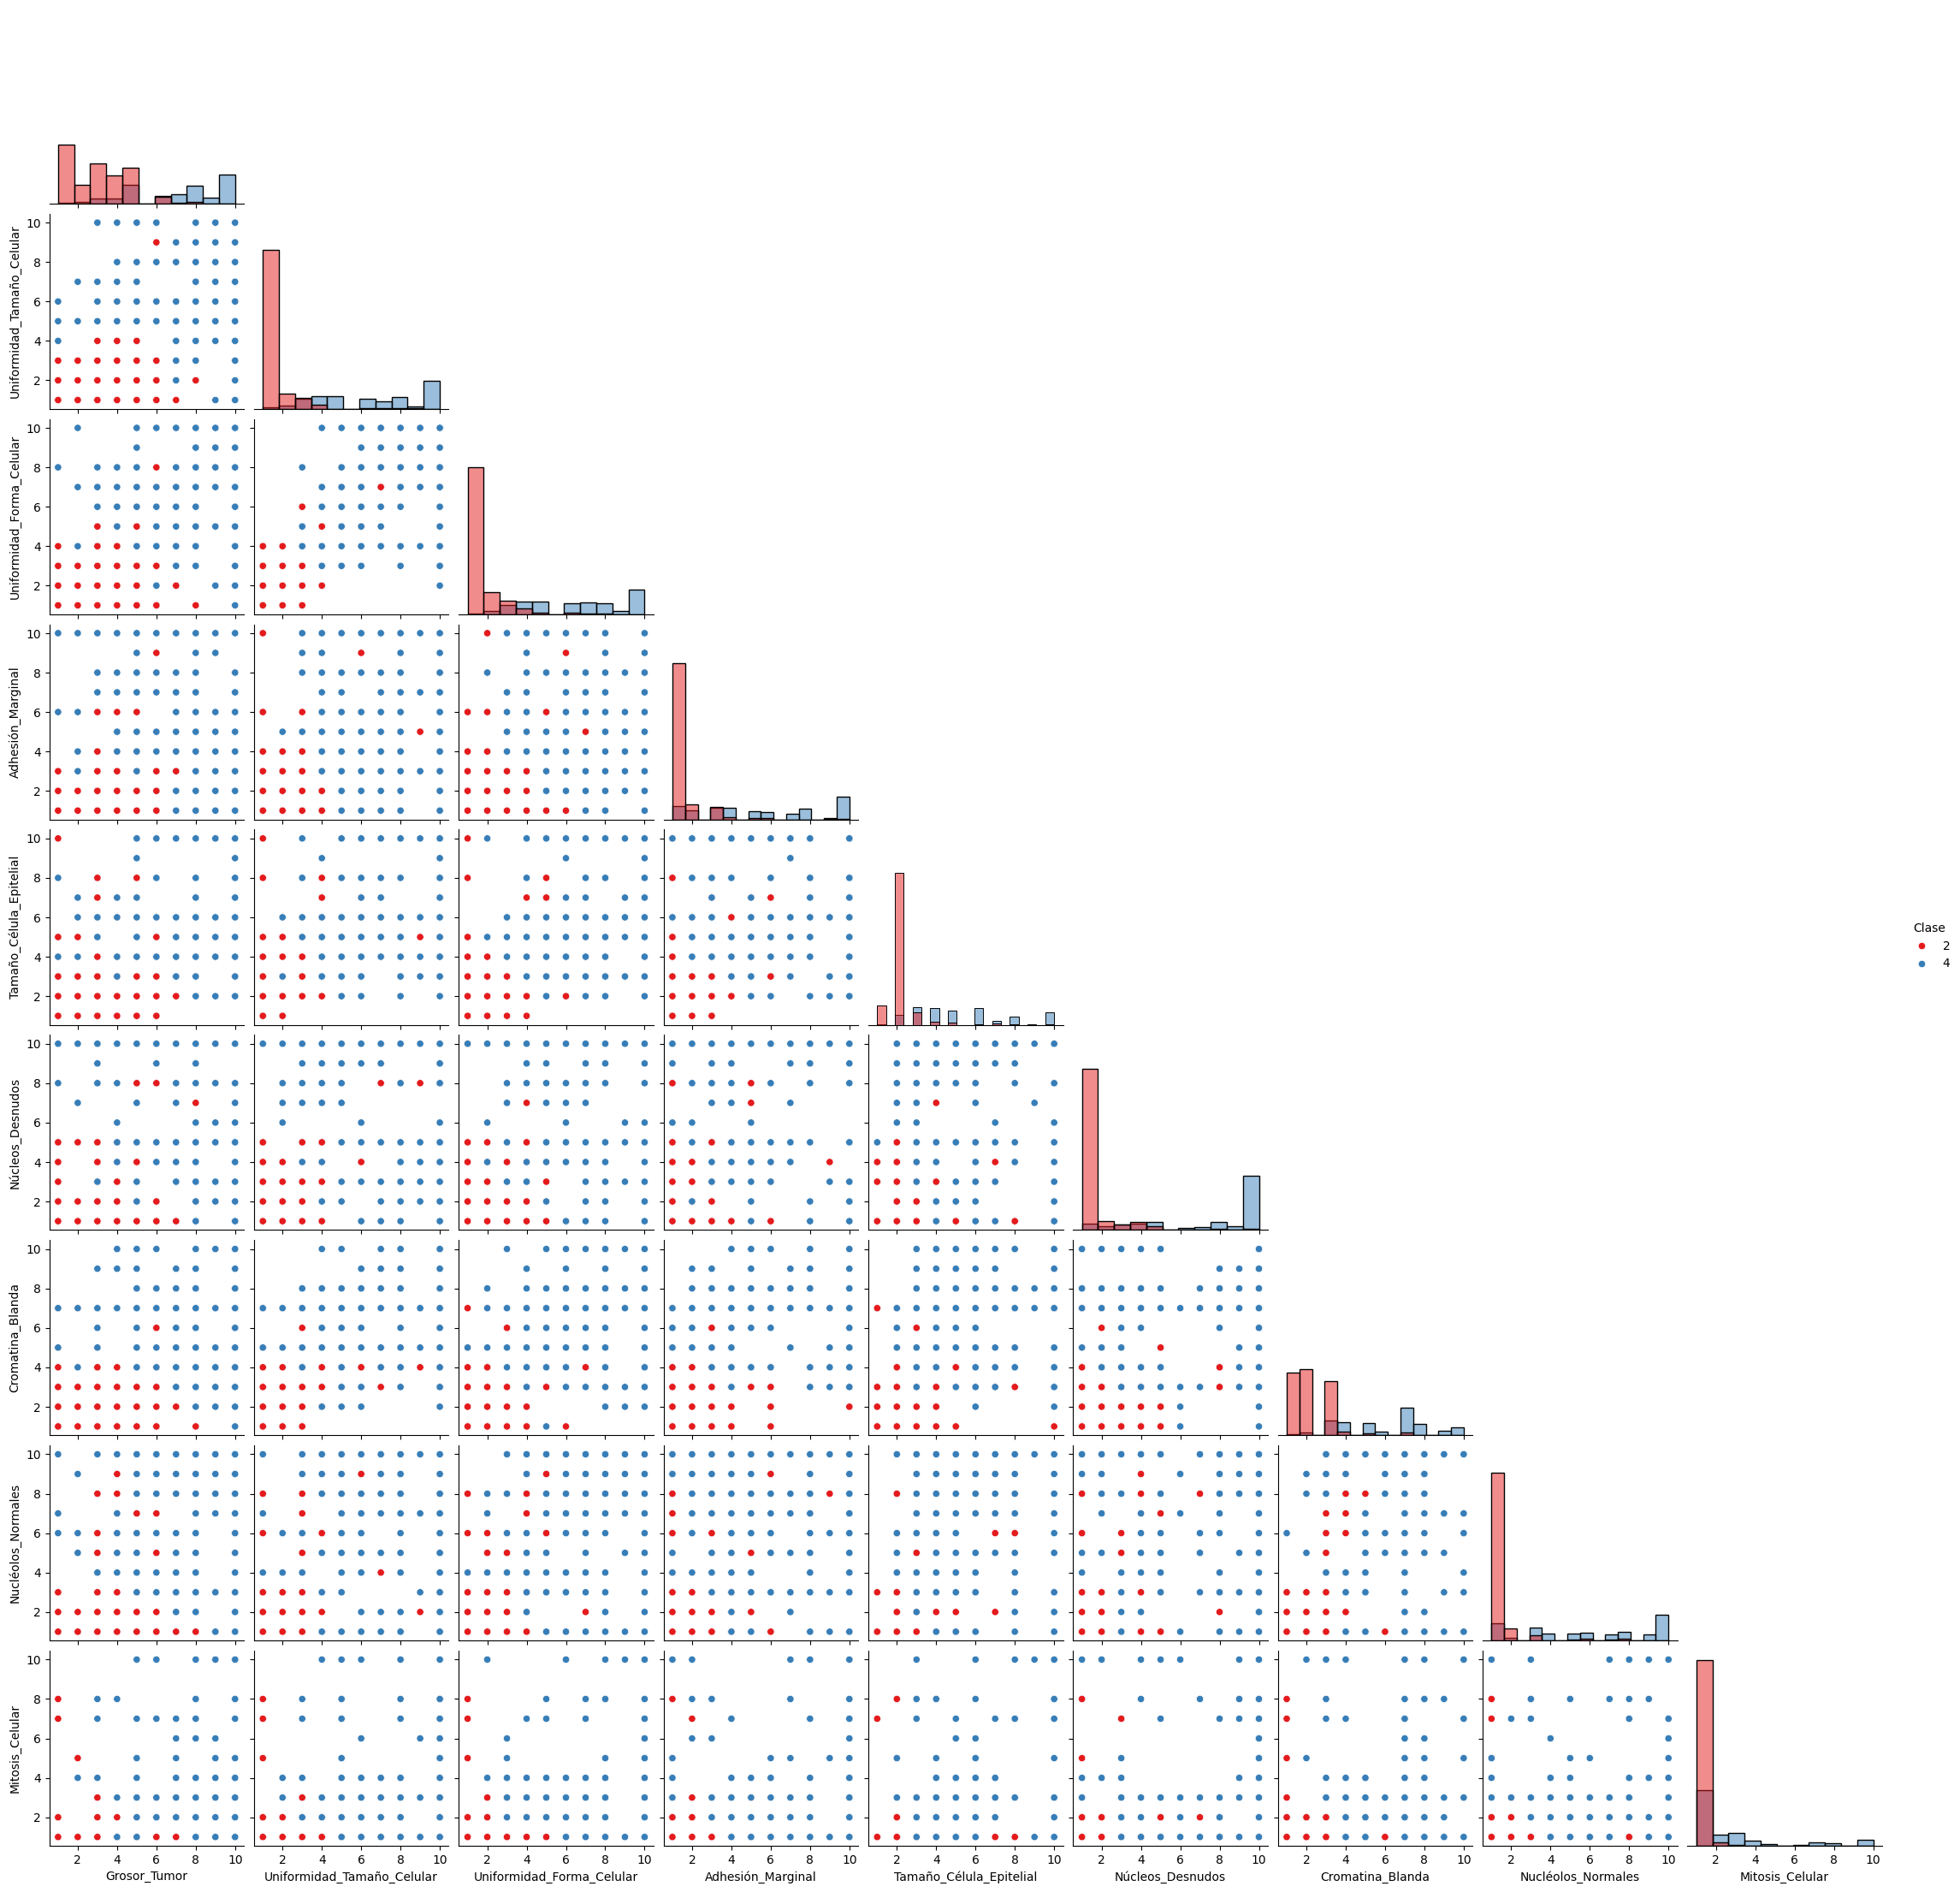

In [16]:
# Especifica la columna que quieres eliminar
column_to_exclude = "ID_Muestra"

# Crear un nuevo DataFrame sin esa columna
df_filtered = df.drop(columns=[column_to_exclude])

# Crear el pairplot sin la columna excluida
sns.pairplot(df_filtered, hue="Clase", diag_kind="hist", corner=True, palette="Set1")
plt.show()



In [11]:
round(df["Núcleos_Desnudos"].mean(),0)

np.float64(4.0)

In [12]:
#de los 699 guardaremos el 60% para entrenamiento
train_df, temporal = train_test_split(df, test_size=0.4, random_state=0)  
#en temporal quedo guardado el 40% de los datos originales
#asi que si dividimos en dos el 40% nos quedaran dos grupos de 20% cada uno
valid_df, test_df = train_test_split(temporal, test_size=0.5, random_state=0)  # 20% validación, 20% prueba


In [13]:
valid_df

,ID_Muestra,Grosor_Tumor,Uniformidad_Tamaño_Celular,Uniformidad_Forma_Celular,Adhesión_Marginal,Tamaño_Célula_Epitelial,Núcleos_Desnudos,Cromatina_Blanda,Nucléolos_Normales,Mitosis_Celular,Clase
408,1236837,2,3,2,2,2,2,3,1,1,2
40,1096800,6,6,6,9,6,4,7,8,1,2
327,756136,1,1,1,1,2,1,2,1,1,2
52,1110102,10,3,6,2,3,5,4,10,2,4
439,566509,5,1,1,1,2,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
541,1171578,3,1,1,1,2,1,1,1,1,2
159,1196295,9,9,10,3,6,10,7,10,6,4
547,1240603,2,1,1,1,1,1,1,1,1,2
568,1343068,8,4,4,1,6,10,2,5,2,4
